
# What is Normal Behaviour?
# Anomaly Detection for Software Vulnerabilities 
## An approach to evaluate a data set if it represents normal behaviour


# TODO:
Different Algorithms, Grid search, try training with test data 

LSTM, Time Series Data 
Anomaly scoring plotten und verhalten bewerten
notes Arbeitslaptop
Bewertung über knowledge of exploits und der Nummer die der Isolation Forest erkennt ? Confusion Matrix!

TODO: CODE aufräumen + Notebooks, Evaluation Methoden Integrieren (Brier Score), Mehrre Models + Datensets, LOCAL OUTLIER DETECTION


### Idea
Feed with dostributions to detect anomal behaviour, What is normal behaviour - from a statistical ppoint of view 
adapating the threshold, if a certain threshold is reached the data doesn't follow normal distribution








## Explorative Data Analysis

### Meta Information


In [1]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.dates as mdates
from scipy.stats import shapiro 

from helpers import *
from predict import A_Model
from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve, auc, brier_score_loss

from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

In [2]:
# Load Data
train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/train.pkl")
test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/test.pkl")
validation = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/validation.pkl")

In [3]:
print(train.shape)
print(test.shape)
print(validation.shape)

(9564, 14)
(39927, 14)
(2603, 14)


### Distributions

Text(0.5, 1.0, 'Memory Usage Distribution Train Data')

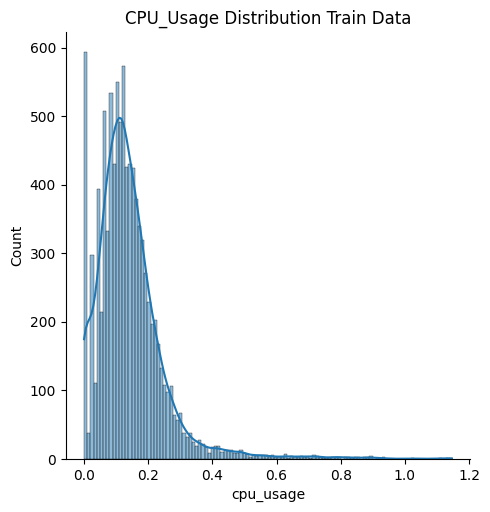

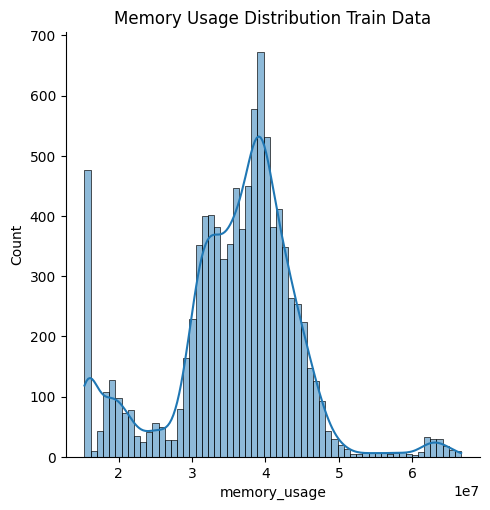

In [24]:
# Distribution Plot Train Data 
sns.displot(data=train, x='cpu_usage', kde=True)
plt.title('CPU_Usage Distribution Train Data')
sns.displot(data=train, x='memory_usage', kde=True)
plt.title('Memory Usage Distribution Train Data')

In [25]:
# Statistical Table
train.describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,exploit
count,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.0
mean,0.141092,3.586510e+07,4084.739753,16489.362087,67.238812,154.606441,0.0
std,0.107538,8.686077e+06,3197.226831,29075.417379,4265.001791,1107.688249,0.0
min,0.000277,1.531904e+07,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.076871,3.189555e+07,2091.000000,6932.000000,0.000000,0.000000,0.0
50%,0.123746,3.720806e+07,3485.000000,11631.000000,0.000000,0.000000,0.0
75%,0.181755,4.089446e+07,5227.000000,18469.000000,0.000000,0.000000,0.0
max,1.146535,6.668288e+07,28425.000000,354543.000000,356352.000000,20480.000000,0.0


In [26]:
test.describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,exploit
count,39927.000000,3.992700e+04,39927.000000,39927.000000,3.992700e+04,3.992700e+04,39927.000000
mean,0.141173,3.568852e+07,4121.127733,16244.512260,3.506431e+02,2.255893e+02,0.132893
std,0.111868,8.876811e+06,3479.540021,29279.070981,1.623316e+04,1.177772e+04,0.339463
min,0.000129,1.361920e+07,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.071625,3.198566e+07,2090.000000,5374.500000,0.000000e+00,0.000000e+00,0.000000
50%,0.125114,3.719578e+07,3485.000000,11593.000000,0.000000e+00,0.000000e+00,0.000000
75%,0.184521,4.099277e+07,5395.000000,18557.500000,0.000000e+00,0.000000e+00,0.000000
max,2.314982,7.683277e+07,35819.000000,614079.000000,1.503232e+06,2.342912e+06,1.000000


Text(0.5, 1.0, 'Distribution Plot Memory Usage Test Data  ')

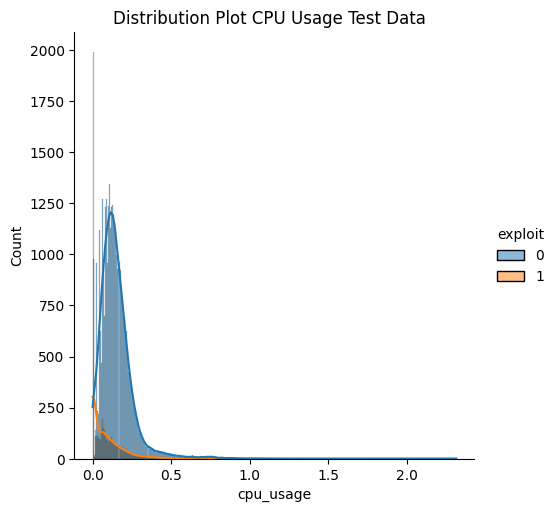

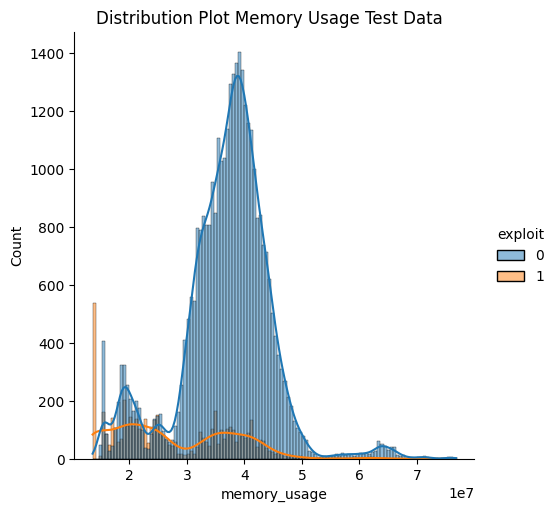

In [32]:
sns.displot(data=test, x='cpu_usage', hue='exploit', kde=True)
plt.title("Distribution Plot CPU Usage Test Data  ")
sns.displot(data=test, x='memory_usage', hue='exploit', kde=True)
plt.title("Distribution Plot Memory Usage Test Data  ")

### Correlation

Text(0.5, 1.0, 'Correlation between Features in Test Data')

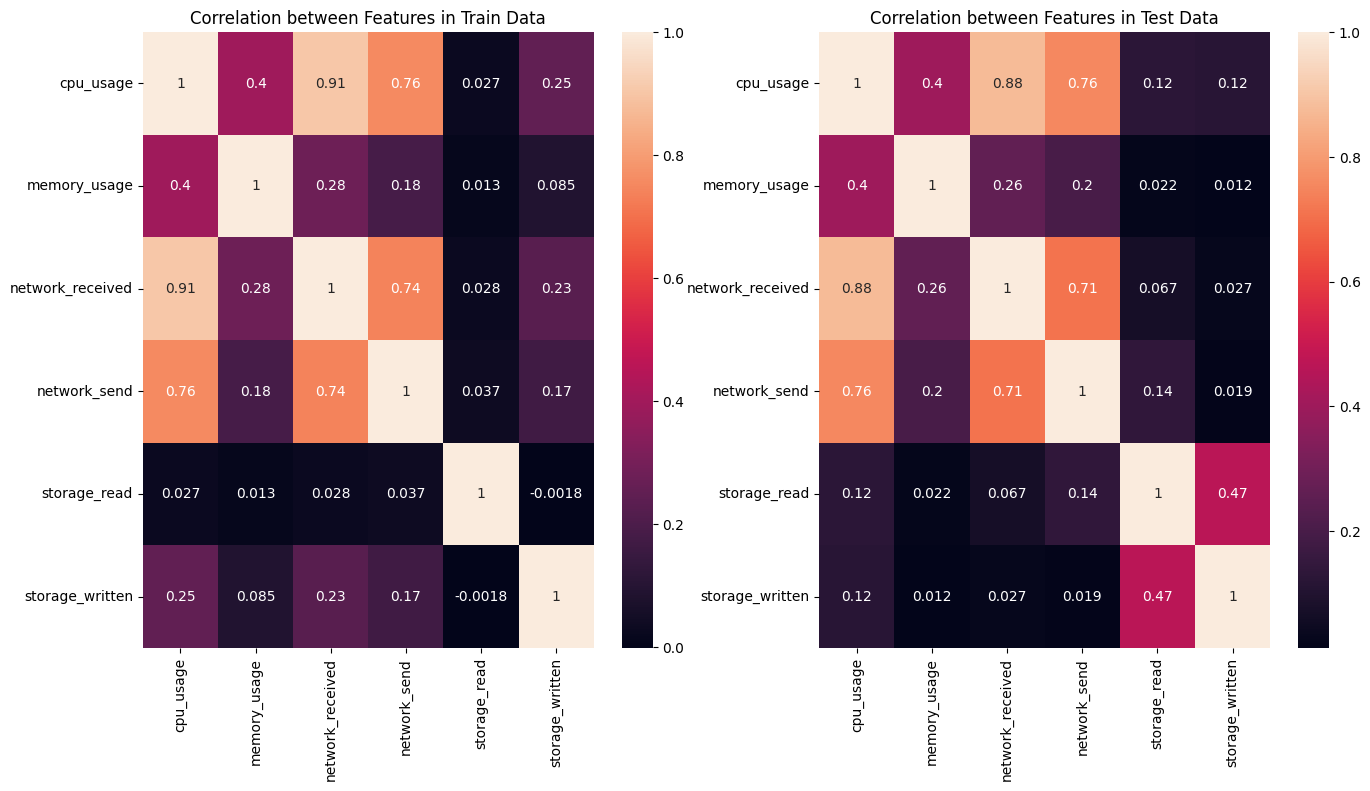

In [4]:
# Correlation of all features -> Scaling after does not make a difference
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.heatmap(train.corr(), annot=True)
plt.title("Correlation between Features in Train Data")
plt.subplot(1, 2, 2)
sns.heatmap(test.corr(), annot=True)
plt.title("Correlation between Features in Test Data")

### Time Series Data 

#### PACF and ACF

### Model 

In [6]:
# Split and encode Data for modelling and evaluation
validation = encode(validation)
test = encode(test)
train = encode(train)
y_true_train = create_y_values(train)
y_true_test = create_y_values(test)
y_true_validation = create_y_values(validation)
X_train = select_columns_for_modelling(train)
X_test = select_columns_for_modelling(test)
X_validation = select_columns_for_modelling(validation)

In [7]:
# known in advance for contmination_rate
contamination_rate_train = calculate_anomalous_rate(train);print(contamination_rate_train)
contamination_rate_test = calculate_anomalous_rate(test);print(contamination_rate_test)
contamination_rate_validation = calculate_anomalous_rate(validation); print(contamination_rate_validation)

0.0
0.1532595823344213
0.0


In [ ]:
ca = PCA(n_components=3)  # Reduce to k=3 dimensions
#scaler = StandardScaler()
#normalize the metrics
X = train[to_model_columns]
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [ ]:
pca = PCA(2)
pca.fit(train[to_model_columns])
res=pd.DataFrame(pca.transform(train[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest Visualization for Train Data")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

# Evaluation 

### Mass Vlume Curve 
### F1 Score

### Cnfusion Matrix

In [ ]:
algorithms = []
name = ['IsolationForest', 'LocalOutlierFactor']
colors = ['red', 'green']

plt.figure(figsize=(12, 6))
for a, algo in enumerate(algorithms):
    algo.fit(X_train)
    algo_train = algo.decision_function(X_train)
    algo_test = algo.decision_function(X_test)
    algo_validation = algo.decision_function(X_validation)

    # as only one class available auc does not work -> Brier Score!
    fpr_train_, tpr_train_, _ = roc_curve(y_true_train, -algo_train)
    algo_auc_train = auc(fpr_train_, tpr_train_)
    
    fpr_test_, tpr_test_, _ = roc_curve(y_true_test, -algo_test)
    algo_auc_test = auc(fpr_test_, tpr_test_)

    # as only one class available auc does not work -> Brier Score!
    fpr_validation_, tpr_validation_, _ = roc_curve(y_true_validation, -algo_validation)
    algo_auc_validation = auc(fpr_validation_, tpr_validation_)

    plt.subplot(1, 2, 1)
    plt.title('Performance on Training set')
    plt.plot(fpr_train_, tpr_train_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_train))
    
    plt.subplot(1, 2, 2)
    plt.title('Performance on Test set')
    plt.plot(fpr_test_, tpr_test_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_test))
    
    plt.subplot(1, 2, 1)
    plt.title('Performance on Validation set')
    plt.plot(fpr_validation_, tpr_validation_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_validation))
    
    
plt.subplot(1, 2, 1)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.subplot(1, 2, 2)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.subplot(1, 2, 1)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.show()